# Frenel equations applied to the Moon (refraction).

**PURPOSE:** Example of application of Fresnel equations for the case of fraction. Simulating the polarization of the Moon.

*@author: jarubinomartin*

October 26, 2025. Based on an IDL code from 2013.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameters
npix    = 128       # number pixels
skycell = 1.0       # arcmin
R_moon = 16.0       # Moon radius in arcmin. Approximate value
n_i  = 1.8          # refraction index (incident = moon interior)
n_t  = 1.0          # refraction index (transmitted = free space)

# Bidimensional array with coordinates
index_i = np.arange(npix)
index_j = index_i[:, np.newaxis]      # equivalente a transpose(index_i)

xx = (index_i - npix / 2.0) * skycell
yy = (index_j - npix / 2.0) * skycell
rr = np.sqrt(xx**2 + yy**2)

# Transmision angle (theta2). Only evaluated in the disc
theta_t = np.zeros((npix, npix), dtype=float)
mask_in = rr <= R_moon
theta_t[mask_in] = np.arcsin(rr[mask_in] / R_moon)

# Fresnel equations for transmission. Using Snell eqn to related theta2=theta_t and theta1.
alpha = np.sqrt(n_i**2 - n_t**2 * np.sin(theta_t)**2)

E_perp = np.zeros_like(theta_t)
E_par = np.zeros_like(theta_t)

E_perp[mask_in] = 2.0 * alpha[mask_in] / ( alpha[mask_in] + n_t * np.cos(theta_t[mask_in]))
E_par[mask_in] = 2.0 * n_i * alpha[mask_in] / ( n_t * alpha[mask_in] + n_i**2 * np.cos(theta_t[mask_in]))

# Intensity and polarized intensity, including solid angle factor n2 costheta2 / n1 costheta1
I = 0.5 * (E_par**2 + E_perp**2) * n_t * np.cos(theta_t) / alpha
P = 0.5 * (E_par**2 - E_perp**2) * n_t * np.cos(theta_t) / alpha

# Stokes parameters Q and U in the local reference frame.
phi = np.arctan2(yy, xx)
Q = P * np.cos(2 * phi)
U = P * np.sin(2 * phi)

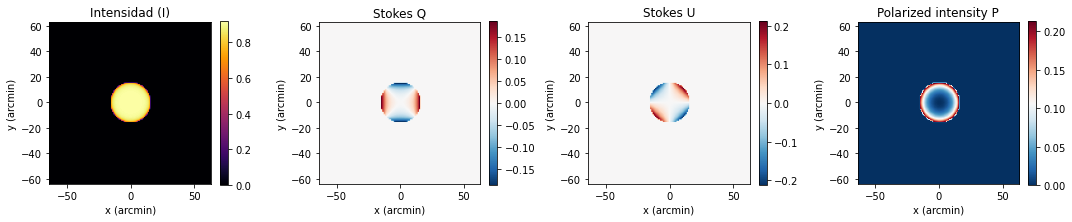

In [45]:
# Display figures:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

im1 = axes[0].imshow(I, origin='lower', cmap='inferno', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[0].set_title("Intensidad (I)")
plt.colorbar(im1, ax=axes[0], fraction=0.046)

im2 = axes[1].imshow(Q, origin='lower', cmap='RdBu_r', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[1].set_title("Stokes Q")
plt.colorbar(im2, ax=axes[1], fraction=0.046)

im3 = axes[2].imshow(U, origin='lower', cmap='RdBu_r', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[2].set_title("Stokes U")
plt.colorbar(im3, ax=axes[2], fraction=0.046)

im4 = axes[3].imshow(P, origin='lower', cmap='RdBu_r', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[3].set_title("Polarized intensity P")
plt.colorbar(im4, ax=axes[3], fraction=0.046)

for ax in axes:
    ax.set_xlabel("x (arcmin)")
    ax.set_ylabel("y (arcmin)")

plt.tight_layout()

**Smoothing with a Gaussian beam of given FWHM**

In [42]:
from scipy.ndimage import gaussian_filter
fwhm_arcmin  = 10.0 
sigma_kernel = fwhm_arcmin/np.sqrt(8*np.log(2))

I_smooth = gaussian_filter(I, sigma=sigma_kernel)
Q_smooth = gaussian_filter(Q, sigma=sigma_kernel)
U_smooth = gaussian_filter(U, sigma=sigma_kernel)
P_smooth = gaussian_filter(P, sigma=sigma_kernel)

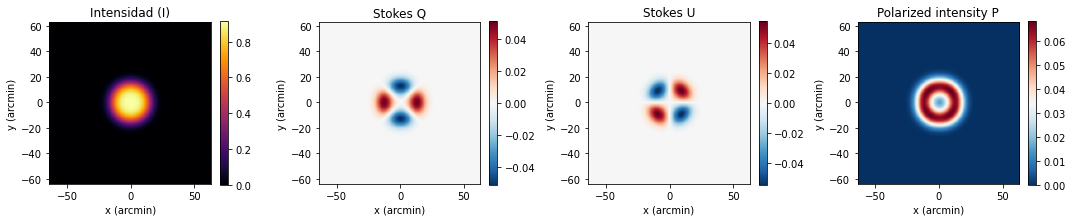

In [44]:
# Display smoothed maps
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

im1 = axes[0].imshow(I_smooth, origin='lower', cmap='inferno', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[0].set_title("Intensidad (I)")
plt.colorbar(im1, ax=axes[0], fraction=0.046)

im2 = axes[1].imshow(Q_smooth, origin='lower', cmap='RdBu_r', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[1].set_title("Stokes Q")
plt.colorbar(im2, ax=axes[1], fraction=0.046)

im3 = axes[2].imshow(U_smooth, origin='lower', cmap='RdBu_r', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[2].set_title("Stokes U")
plt.colorbar(im3, ax=axes[2], fraction=0.046)

im4 = axes[3].imshow(P_smooth, origin='lower', cmap='RdBu_r', extent=[xx.min(), xx.max(), yy.min(), yy.max()])
axes[3].set_title("Polarized intensity P")
plt.colorbar(im4, ax=axes[3], fraction=0.046)

for ax in axes:
    ax.set_xlabel("x (arcmin)")
    ax.set_ylabel("y (arcmin)")

plt.tight_layout()